## Task 1: Basic Image Statistics and Color Space Conversion
### Objective:
Compute basic statistics and convert an image into different color spaces.
Steps:
* Read the Image: Load an image using OpenCV.
* Compute Basic Statistics: Calculate the mean, standard deviation, and histogram of each color 
    channel.
* Convert Color Spaces: Convert the image to HSV and Lab color spaces and display the results

Mean: [[120.69230458]
 [124.97780712]
 [129.48682187]]
Standard Deviation: [[57.59516747]
 [41.81767232]
 [59.63598825]]


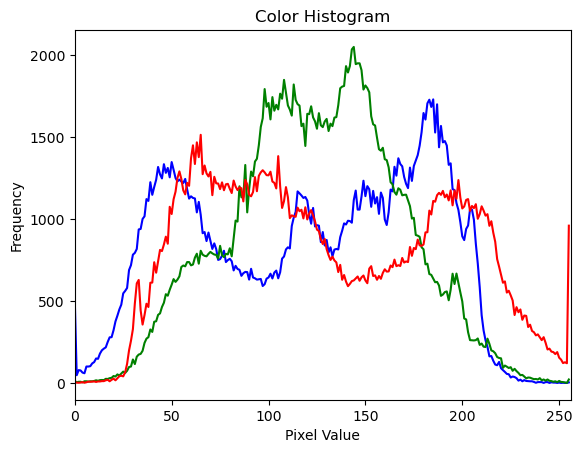

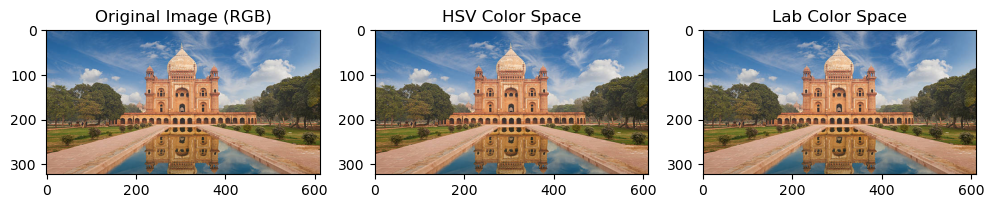

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Image
image = cv2.imread(r'C:\Users\DELL\Machine_Vision\lab1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Step 2: Compute Basic Statistics
mean, stddev = cv2.meanStdDev(image)
print(f"Mean: {mean}")
print(f"Standard Deviation: {stddev}")

# Calculate histogram for each color channel
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: Convert Color Spaces
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
plt.title('HSV Color Space')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_lab, cv2.COLOR_Lab2RGB))
plt.title('Lab Color Space')

plt.show()


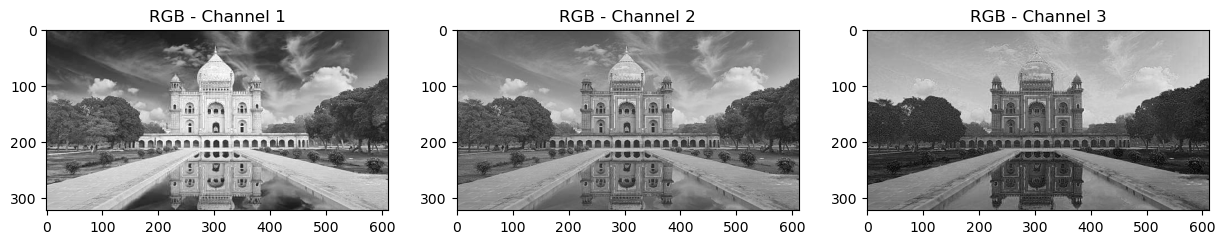

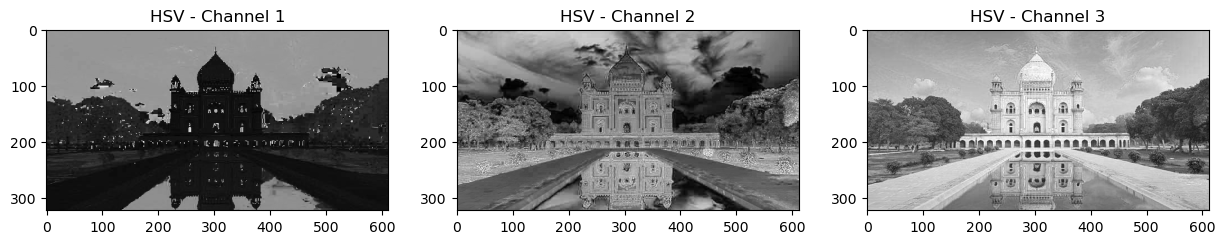

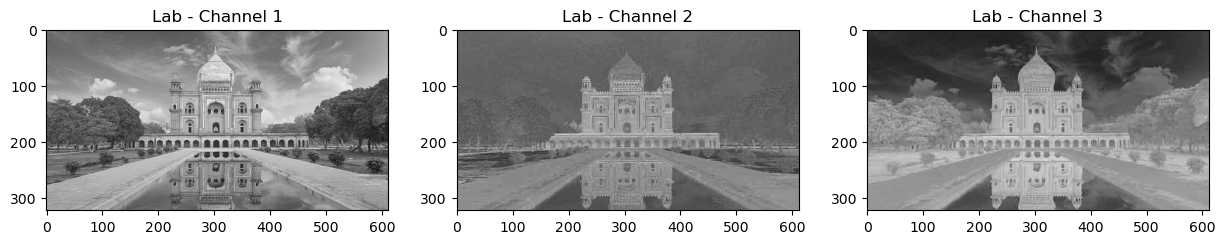

In [9]:
def display_channels(image, title):
    plt.figure(figsize=(15, 5))
    for i, channel in enumerate(['Channel 1', 'Channel 2', 'Channel 3']):
        plt.subplot(1, 3, i+1)
        plt.imshow(image[:,:,i], cmap='gray')
        plt.title(f'{title} - {channel}')
    plt.show()

# Display channels for each color space
display_channels(image_rgb, 'RGB')
display_channels(image_hsv, 'HSV')
display_channels(image_lab, 'Lab')

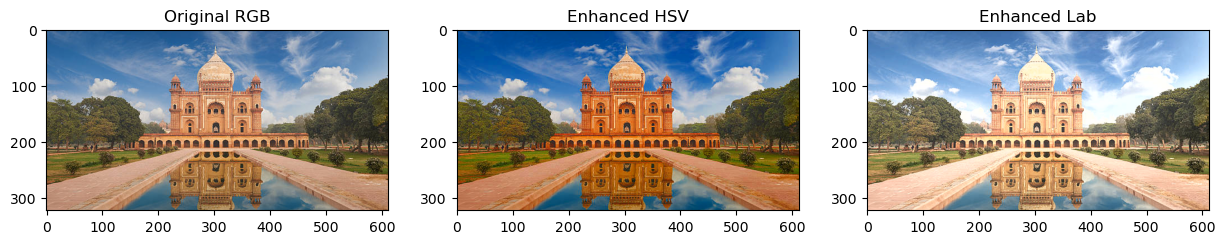

In [11]:
# Enhance HSV
enhanced_hsv = image_hsv.copy()
enhanced_hsv[:,:,1] = np.clip(enhanced_hsv[:,:,1] * 1.5, 0, 255)  # Increase saturation

# Enhance Lab
enhanced_lab = image_lab.copy()
enhanced_lab[:,:,0] = np.clip(enhanced_lab[:,:,0] * 1.3, 0, 255)  # Increase lightness

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image_rgb), plt.title('Original RGB')
plt.subplot(132), plt.imshow(cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2RGB)), plt.title('Enhanced HSV')
plt.subplot(133), plt.imshow(cv2.cvtColor(enhanced_lab, cv2.COLOR_Lab2RGB)), plt.title('Enhanced Lab')
plt.show()

## Task 2: Simple Image Segmentation Using Thresholding
* **Step 1**: Read the Image
We'll load a grayscale image.

* **Step 2**: Apply Thresholding
We'll use a fixed threshold value to segment the image.

* **Step 3**: Display Results
We'll show the original and segmented images.

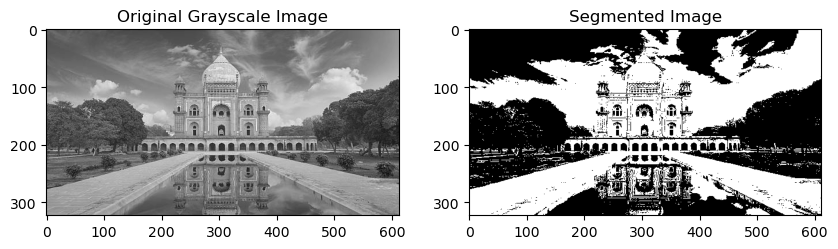

In [19]:
# Step 1: Read the Image
image_gray = cv2.imread(r'C:\Users\DELL\Machine_Vision\lab1.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Thresholding
threshold_value = 127
_, segmented_image = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

# Step 3: Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')

plt.show()


## Task 3: Color-Based Segmentation
### Objective:
Segment specific objects in an image based on their color.

**Steps**:
1. **Read the Image**: Load an image with objects of different colors.
2. **Convert to HSV**: Convert the image to HSV color space.
3. **Apply Color Thresholding**: Use color thresholds to segment objects of a specific color.
4. **Display Results**: Show the original and segmented images.

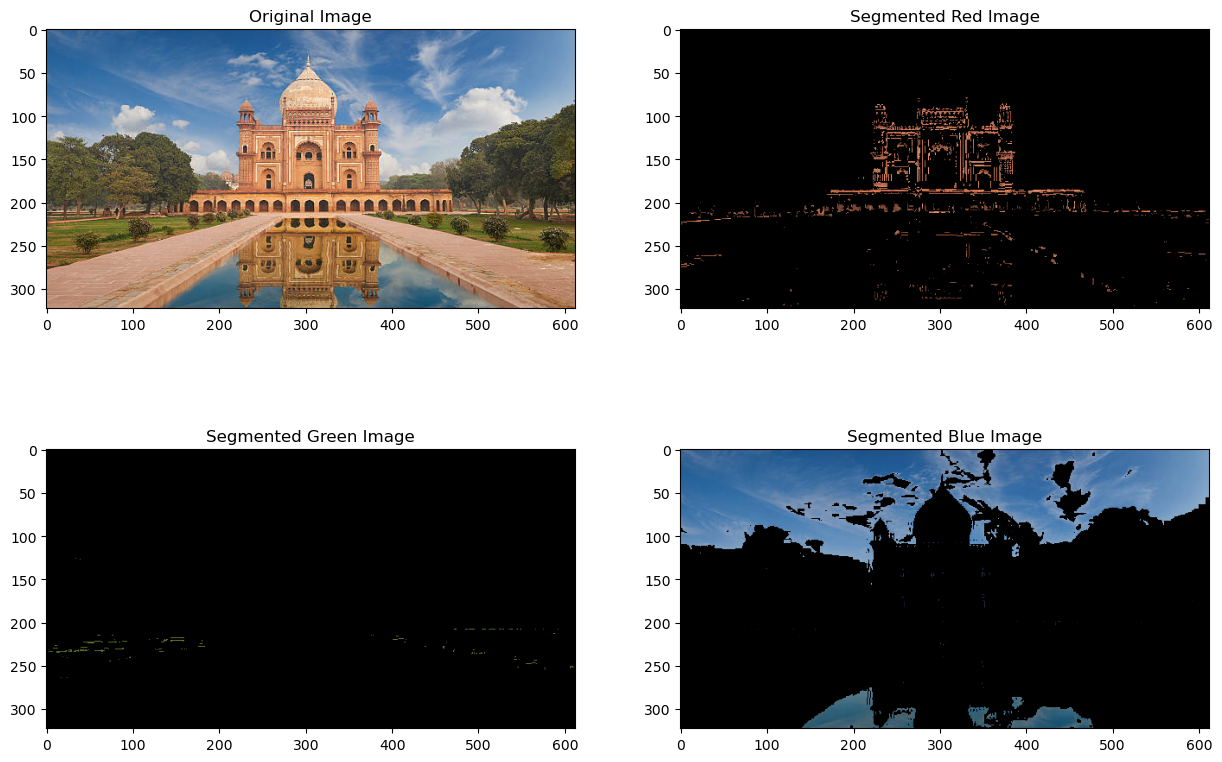

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Image
image_path = r'C:\Users\DELL\Machine_Vision\lab1.jpg'
image = cv2.imread(image_path)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for segmentation
color_ranges = {
        'Red': [([0, 120, 70], [10, 255, 255]), ([170, 120, 70], [180, 255, 255])],
        'Green': [([36, 100, 100], [86, 255, 255])],
        'Blue': [([94, 80, 2], [126, 255, 255])]
}

# Plot original image
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Iterate through color ranges and segment the image
for i, (color, ranges) in enumerate(color_ranges.items(), start=2):
    mask = np.zeros(image_hsv.shape[:2], dtype="uint8")
    for (lower, upper) in ranges:
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        mask += cv2.inRange(image_hsv, lower, upper)

    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Display results
    plt.subplot(2, 2, i)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Segmented {color} Image')

plt.show()
